In [1]:
library(GLMsData)
library(ggplot2)

In [2]:
data(sheep)

In [3]:
str(sheep)

'data.frame':	64 obs. of  2 variables:
 $ Weight: num  22.1 26.2 33.2 34.3 49 52.6 27.6 31 32.6 44.6 ...
 $ Energy: num  1.31 1.27 1.25 1.14 1.78 1.7 1.39 1.47 1.75 2.25 ...


In [4]:
lm.weight <- lm(Energy ~ Weight, data=sheep)

In [5]:
summary(lm.weight)


Call:
lm(formula = Energy ~ Weight, data = sheep)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76227 -0.22099  0.00156  0.21907  1.31339 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.132941   0.180436   0.737    0.464    
Weight      0.043416   0.004857   8.939 9.45e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3662 on 62 degrees of freedom
Multiple R-squared:  0.5631,	Adjusted R-squared:  0.5561 
F-statistic: 79.91 on 1 and 62 DF,  p-value: 9.447e-13


In [6]:
names(lm.weight)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [7]:
confint(lm.weight)

,2.5 %,97.5 %
(Intercept),-0.2277457,0.49362720
Weight,0.0337072,0.05312422


In [8]:
sum(resid(lm.weight)^2) / df.residual(lm.weight)

[1] 0.1341297

In [9]:
newWeight <- seq(min(sheep$Weight), max(sheep$Weight), 0.1)

In [10]:
out <- predict(lm.weight, se.fit=TRUE, newdata=data.frame(Weight=newWeight))

In [11]:
names(out)

[1] "fit"            "se.fit"         "df"             "residual.scale"

In [12]:
tsar <- qt(df=lm.weight$df, p=0.975)

In [13]:
ci.lo <- out$fit - tsar*out$se.fit
ci.up <- out$fit + tsar*out$se.fit

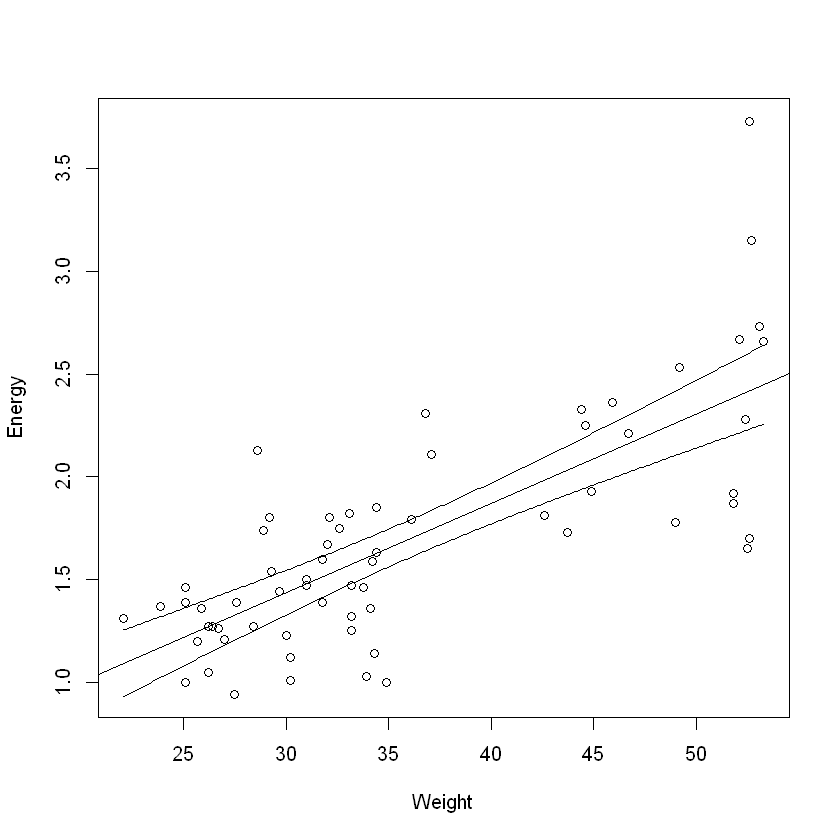

In [14]:
plot(Energy ~ Weight, data=sheep)
abline(lm.weight)
lines(newWeight, ci.lo)
lines(newWeight, ci.up)

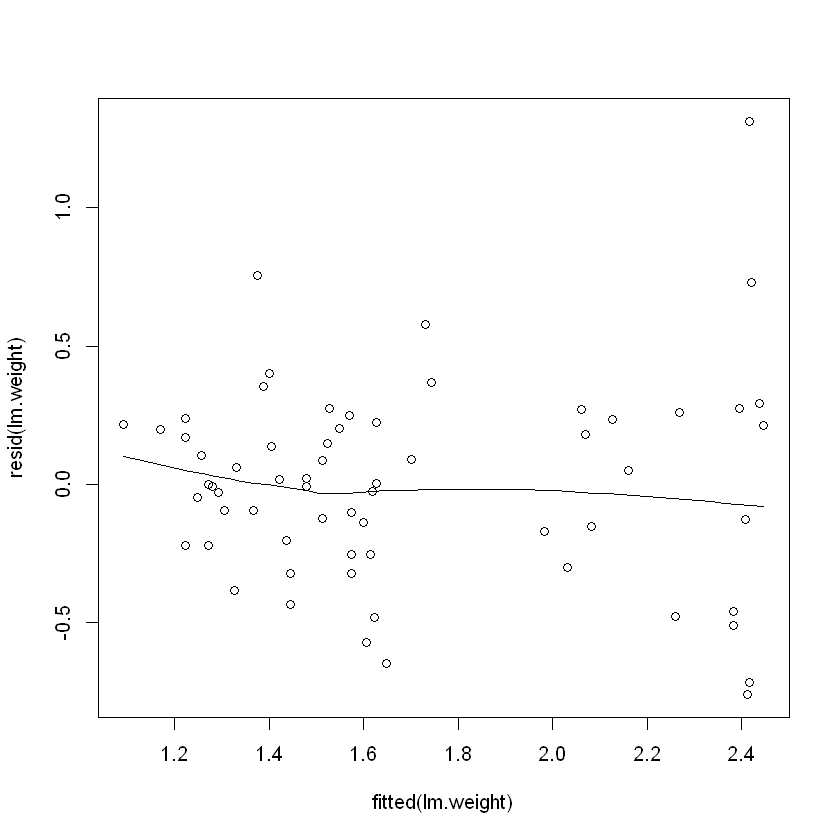

In [16]:
scatter.smooth(resid(lm.weight) ~ fitted(lm.weight))

In [18]:
cd <- cooks.distance(lm.weight)